# About this notebook

This notebook briefly summarizes Yelp business dataset, with a focus on restaurant industry, for the purpose of scoping our project. Needs for data cleaning and wrangling were also indentified. At the end of this notebook, a summary section is provided.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Yelp business dataset

In [2]:
data_file = open("yelp_academic_dataset_business.json")
data = []
for line in data_file:
    data.append(json.loads(line))
business_df = pd.DataFrame(data)
data_file.close()

In [3]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


# General overview of Yelp business dataset

How many observations and columns are there in the *business* dataset?

In [4]:
print('Yelp business table shape:', business_df.shape)

Yelp business table shape: (160585, 14)


Dataset info

In [5]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   160585 non-null  object 
 1   name          160585 non-null  object 
 2   address       160585 non-null  object 
 3   city          160585 non-null  object 
 4   state         160585 non-null  object 
 5   postal_code   160585 non-null  object 
 6   latitude      160585 non-null  float64
 7   longitude     160585 non-null  float64
 8   stars         160585 non-null  float64
 9   review_count  160585 non-null  int64  
 10  is_open       160585 non-null  int64  
 11  attributes    145593 non-null  object 
 12  categories    160470 non-null  object 
 13  hours         133244 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB


In [12]:
# by state: how many businesses are there?
business_df.groupby("state").agg({'business_id': 'count'}).sort_values(by = "business_id", ascending = False)

,business_id
state,
MA,36012
OR,25175
TX,24485
FL,21907
GA,18090
BC,17298
OH,11258
CO,3198
WA,3121


# The restaurant industry

In [6]:
# identify key words in 'categories'
include_restaurant = business_df['categories'].str.contains('Restaurants', na = False)
include_hotels = business_df['categories'].str.contains('Hotels', na = False)

In [7]:
# examples of categories that include 'Restaurants' and 'Hotels'
business_df[include_restaurant & include_hotels][['categories']]

,categories
16,"Restaurants, American (New), Food Court, Flowe..."
22,"Hotels, American (Traditional), Restaurants, E..."
861,"Hotels, Event Planning & Services, Restaurants..."
1218,"Breakfast & Brunch, Bed & Breakfast, Comfort F..."
1278,"Event Planning & Services, Nightlife, Hotels &..."
...,...
156111,"Hotels, Hotels & Travel, Steakhouses, Seafood,..."
157202,"Event Planning & Services, Hotels, Hotels & Tr..."
157411,"Nightlife, Hotels & Travel, Hostels, Bars, Ven..."
159926,"Day Spas, Beauty & Spas, Seafood, Hotels, Rest..."


In [8]:
# extract restaurants from the business dataset
# include entries that has key word 'Restaurants' but exclude entries that has key word 'Hotels'
restaurants_df = business_df[include_restaurant & ~include_hotels]
restaurants_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,None,"Breakfast & Brunch, Restaurants","{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [9]:
# how many restaurants are the dataset?
print('Yelp restaurant table shape:',restaurants_df.shape)

Yelp restaurant table shape: (50395, 14)


In [10]:
# any missing values? how many are there?
restaurants_df.isna().sum()

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       441
categories         0
hours           7834
dtype: int64

## Restaurants by state

In [11]:
# by state: how many restaurants are there?
restaurants_df.groupby("state").agg({'business_id': 'count'}).sort_values(by = "business_id", ascending = False)

,business_id
state,
MA,10473
FL,7613
BC,7477
OR,7345
GA,6112
TX,5414
OH,4322
CO,859
WA,773


What is that`ABE` state? Some states only have one restaurant business recorded in the dataset. Check them out. 

In [29]:
restaurants_df[restaurants_df["state"] == "ABE"]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
129241,WaD_wuvvDFPTrz8ouDPtAw,Kitanoya Guu Garlic,1698 Robson Street,Vancouver,ABE,V6G 1C7,49.29065,-123.133761,4.5,14,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Restaurants, Japanese","{'Monday': '17:30-0:30', 'Tuesday': '17:30-0:3..."


In [30]:
flagged_states = ["ABE", "KS", "MN", "NH", "VA", "WY", "KY"]

restaurants_df[restaurants_df["state"].isin(flagged_states)]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1140,hWRZaOk4JWUPFhcomdOLwA,Pizza Hut,512 Kunkle Dr,Ellsworth,KS,67439,38.737121,-98.216310,2.0,28,1,"{'NoiseLevel': ''quiet'', 'RestaurantsGoodForG...","Chicken Wings, Restaurants, Italian, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
84075,HorLV50SgSj2lArWWu4lEA,Caribou Coffee,1001 18th Ave NW,Austin,MN,55912,30.202130,-97.668832,3.5,6,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Food, Coffee & Tea, Bakeries, Cafes, Restaurants","{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'..."
84535,SZnLkA6yt6ygmnmLJ2GAaA,Little Caesars,4719 Walmsley Blvd,Richmond,VA,23234,49.155176,-123.124627,2.0,7,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Restaurants, Pizza","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
92924,kCuT3xDEMWjzfpN70kIRyg,Good Times Burgers & Frozen Custard,2175 Sugarland Dr,Sheridan,WY,82801,40.022457,-105.260884,1.5,9,1,"{'RestaurantsReservations': 'False', 'Business...","Burgers, Fast Food, Diners, Ice Cream & Frozen...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
101941,Nt1yt4ManiApH31xm6roBQ,Pizza Hut,543 N Wallace Wilkinson Blvd,Liberty,KY,42539,37.321719,-84.927085,2.0,11,1,"{'Caters': 'False', 'RestaurantsTakeOut': 'Tru...","Chicken Wings, Italian, Restaurants, Pizza","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
103285,Dxty4sEe63-eKmMKyCcN0w,Piece O Pizza,131 Daniel Webster Hwy,Nashua,NH,03060,42.504846,-71.071029,4.0,17,1,"{'HasTV': 'True', 'BusinessAcceptsCreditCards'...","Restaurants, Food, Italian, Pizza, Food Delive...","{'Wednesday': '16:0-21:0', 'Thursday': '16:0-2..."
129241,WaD_wuvvDFPTrz8ouDPtAw,Kitanoya Guu Garlic,1698 Robson Street,Vancouver,ABE,V6G 1C7,49.290650,-123.133761,4.5,14,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Restaurants, Japanese","{'Monday': '17:30-0:30', 'Tuesday': '17:30-0:3..."


`ABE` state seems to be a typo.

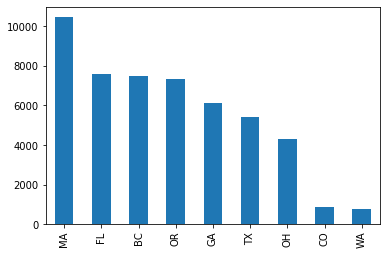

In [31]:
restaurants_df[~restaurants_df['state'].isin(flagged_states)]['state'].value_counts().plot(kind = "bar")
plt.show()


In [33]:
# For each state, how many cities are listed in this Yelp restaurant dataset?
restaurants_df.drop_duplicates(subset=['state','city']).groupby('state') \
.agg({'city': 'count'}).sort_values(by = 'city', ascending = False)

,city
state,
MA,133
FL,104
OH,57
GA,52
OR,33
TX,33
BC,28
CO,14
WA,5


In [34]:
# Total number of restaurants if focused on contrasting states in covid measures
focused_states = ['MA','FL']

print('Focusing on the above states, the restaurant table shape:', \
      restaurants_df[restaurants_df["state"].isin(focused_states)].shape)

Focusing on the above states, the restaurant table shape: (18086, 14)


**Note:** Restaurants listed under a particular state in this Yelp dataset seems to be concentrated around metro area. They are not representative samples of locations for a state. See GA close-up in later section.

In [35]:
# If we only include US states, 
# What is the total number of restaurants?
flagged_states = ["ABE", "BC"]

restaurants_us = restaurants_df[~restaurants_df['state'].isin(flagged_states)]

print('Focusing on US restaurants, the table shape: ', restaurants_us.shape) 

Focusing on US restaurants, the table shape:  (42917, 14)


In [36]:
# What is the proportion of this dataset of US restaurants compare to the initial dataset?
round((42917/160585),2)

0.27

In [37]:
# export business_id of US restaurants
restaurants_us_ids = restaurants_us[['business_id']]
restaurants_us_ids.to_csv(r'restaurants_us.csv',index = False)

## Restaurants by city (and state)

**Note:** `city` data needs clean-up as there are inconsistencies in spelling a city's name

In [51]:
# by state and city: how many restaurants are there in the dataset?
counted_by_city = restaurants_us.groupby(["state", "city"], as_index = False) \
.agg({'business_id': 'count'}).sort_values(by = 'business_id', ascending = False)

counted_by_city.columns = ['state', 'city','number_of_restaurants']

counted_by_city

,state,city,number_of_restaurants
383,OR,Portland,5686
398,TX,Austin,4930
120,GA,Atlanta,4156
81,FL,Orlando,3687
182,MA,Boston,2800
...,...,...,...
206,MA,East boston,1
209,MA,Franklin,1
210,MA,HOLB,1
211,MA,Hanover,1


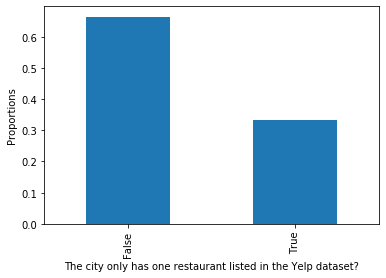

In [52]:
counted_by_city['one_restaurant'] = counted_by_city['number_of_restaurants'] == 1

counted_by_city['one_restaurant'].value_counts(normalize=True).plot(kind = 'bar')
plt.xlabel('The city only has one restaurant listed in the Yelp dataset?')
plt.ylabel('Proportions')
plt.show()

In [53]:
# the 25 cities with higest number of restaurants listed in Yelp dataset
top25_city = counted_by_city.sort_values('number_of_restaurants', ascending = False) \
.head(25)[['state', 'city','number_of_restaurants']]

top25_city

,state,city,number_of_restaurants
383,OR,Portland,5686
398,TX,Austin,4930
120,GA,Atlanta,4156
81,FL,Orlando,3687
182,MA,Boston,2800
315,OH,Columbus,2605
190,MA,Cambridge,764
435,WA,Vancouver,750
58,FL,Kissimmee,689
2,CO,Boulder,660


In [54]:
# what states are represented in the top 25 cities?
top25_city.groupby('state').agg({'city' : 'count'}).sort_values(by = 'city', ascending = False)

,city
state,
MA,8
FL,6
GA,3
OR,3
OH,2
CO,1
TX,1
WA,1


In [45]:
# Closeup GA
counted_by_city[counted_by_city['state'] == 'GA']

,state,city,number_of_restaurants,one_restaurant
149,GA,Atlanta,4156,False
166,GA,Decatur,502,False
193,GA,Smyrna,246,False
195,GA,Tucker,156,False
183,GA,Marietta,153,False
191,GA,Sandy Springs,142,False
167,GA,Doraville,128,False
157,GA,Chamblee,104,False
161,GA,College Park,81,False
170,GA,East Point,71,False


# Restaurant categories

In [58]:
unique_categories = restaurants_df.drop_duplicates(subset = 'categories')[['categories']]
unique_categories # include BC restaurants

,categories
0,"Gastropubs, Food, Beer Gardens, Restaurants, B..."
1,"Salad, Soup, Sandwiches, Delis, Restaurants, C..."
5,"Restaurants, Thai"
7,"Breakfast & Brunch, Restaurants"
12,"Food, Pizza, Restaurants"
...,...
160572,"Restaurants, Noodles, Salad, Vietnamese, Veget..."
160573,"American (Traditional), Desserts, American (Ne..."
160574,"Mexican, Bars, Nightlife, Tex-Mex, Restaurants"
160583,"Cuban, Sandwiches, Restaurants, Cafes"


In [59]:
# look at an entry
unique_categories.iloc[0,0]

'Gastropubs, Food, Beer Gardens, Restaurants, Bars, American (Traditional), Beer Bar, Nightlife, Breweries'

In [60]:
# look at another entry
unique_categories.iloc[15,0]

'Indian, Restaurants'

# Restaurant attributes

In [49]:
attributes_df = restaurants_df['attributes'] # include BC restaurants

In [9]:
attributes_df.head()

0     {'RestaurantsTableService': 'True', 'WiFi': 'u...
1     {'RestaurantsTakeOut': 'True', 'RestaurantsAtt...
5     {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...
7                                                  None
12    {'RestaurantsGoodForGroups': 'True', 'HasTV': ...
Name: attributes, dtype: object

In [50]:
# check whether the attributes column contains ownership info, such as latin-owned restaurants
latin_owned_df = restaurants_df[restaurants_df['attributes'].str.contains('owned', na = False)]
latin_owned_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


# US Restaurant review counts

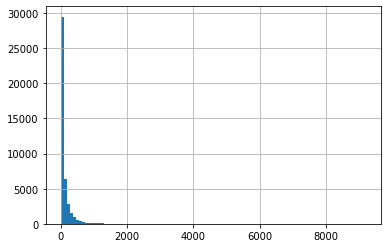

In [63]:
restaurants_us['review_count'].hist(bins = 100)

In [77]:
def q25(column):
    return column.quantile(0.25)

def q75(column):
    return column.quantile(0.75)

In [78]:
print(restaurants_us['review_count'].agg([np.min, q25, np.median, q75, np.max, np.mean]))

amin         5.000000
q25         17.000000
median      47.000000
q75        126.000000
amax      9185.000000
mean       114.819605
Name: review_count, dtype: float64


# US Restaurant open indicator

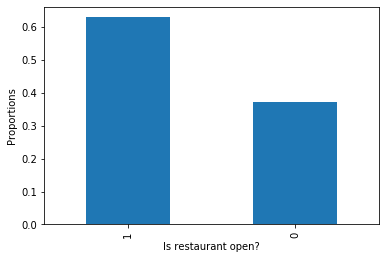

In [79]:
restaurants_us['is_open'].value_counts(normalize=True).plot(kind = 'bar')
plt.xlabel('Is restaurant open?')
plt.ylabel('Proportions')
plt.show()

In [80]:
restaurants_us['is_open'].value_counts(normalize=True)

1    0.629331
0    0.370669
Name: is_open, dtype: float64

# US Restaurant star

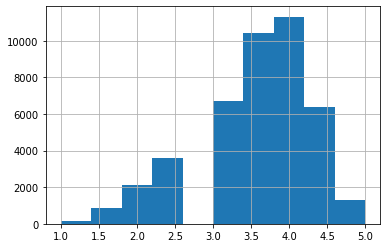

In [85]:
restaurants_us['stars'].hist()

# Summary

## Recap on the Yelp business dataset

* The `business` dataset contains about 31 states, including 2 Canadian states and 1 seemly typo state. These states do not cover all the metropolitan areas that Yelp claims in its documentation. For instance, PA, the state where Pittsburg is, is not listed in the `business` dataset.

* A business can have more than one entry in its `categories`. To extract restaurants, we selected businesses that include `Restaurants` but not `Hotels` in their entries under the `categories` column. Using this selection method, there are 42,917 restaurants located in the US listed in the Yelp dataset. This number includes restaurants in states that only has one observation reported in this dataset. For example, these states: `"KS", "MN", "NH", "VA", "WY", "KY"` only have one restaurant listed in Yelp `business` dataset. 

* Restaurants listed under a particular state in this Yelp dataset seems to be concentrated around metro area. They are not representative samples of locations for a state. For example, see GA close-up in the earlier section.


## Data cleaning and wrangling needed

Data cleaning and wrangling needed to prepare this dataset for EDA and ML algorithms:

1. Cleaning `city` variable: The `city` column needs clean-up as there are inconsistencies in spelling a city's name.

2. Wrangling `categories` variable: This variable is currently a list that combines type of cuisine (e.g., Thai, Mexian), type of food (e.g., burgers, soups, desserts), atmosphere (e.g., gastropubs, cafes), and type of meals (e.g., breakfast & brunch) among others. 

3. Wrangling `attributes` variable: This variable is currently a dictionary of dictionaries. And each entry does not necessarily list all features. 